# Assignment 3: KNN 

- KNN means K-Neighbour neighbours which can store all available cases and classifies new measures based on the similarity measure(e.g., distance functions).


- It can use the Euclidean Distance which means distance between two points.
               
               dis(X,Y) = sqrt(sum(xi - yi)) 
- It works as follows:
               
               1. For an given Query point it can find the all K-nearest neighbours based on the distance.
               2. Find the class labels for all neighbours.
               3. Then give the majority vote among all neighbours class labels.
- Failure cases of KNN:
           
               1. if outliers are present then knn will not work as our expectation.
               2. if data is randomly spread by that we don't get usefull information, in that case it will not work well.

- To train knn time is very less but incase of test time is more, so we cann't use for internet applications, stock market etc

- For KNN, K is an hyperparameter so, as K increases then the smoothness of the decision surface will increase.

- But there is some problem as k is very low then leads to overfitting problem(which means training error is low), as K increases then problem of underfit(e.g., suppose if we have 70 +ve points and 30 -ve points if k>=70 then knn will always classifies +ve point eventhough our original Query point is negative.), Train error is high for underfit.

- Advantages:
             
             1. Simple and effective.
             2. Makes no assumptions.
             3. Fast Training phase.
- Disadvantages:
            
             1. Slow Classification Phase(which means testing phase).
             2. Requires lot amount of memory
             3. Nomina features and missing data requires additional processing.

In [266]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [267]:
import pickle 
def savetofile(obj,filename):
    pickle.dump(obj,open(filename,"wb"))
    
def openfromfile(filename):
    temp=pickle.load(open(filename,"rb"))
    return temp

In [268]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim

In [269]:
#Loading the dataset
data_frame = openfromfile("New_Amazon_preprocess_data")

In [270]:
#shape of the dataframe
print("Shape of the Data Frame", data_frame.shape)

#first 5 rows of the dataframe
data_frame.head()

Shape of the Data Frame (364171, 11)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
515425,515426,141278509X,AB1A5EGHHVA9M,CHelmic,1,1,positive,1332547200,The best drink mix,This product by Archer Farms is the best drink...,product archer farm best drink mix ever mix fl...
24750,24751,2734888454,A1C298ITT645B6,Hugh G. Pritchard,0,0,positive,1195948800,Dog Lover Delites,Our dogs just love them. I saw them in a pet ...,dog love saw pet store tag attach regard made ...
24749,24750,2734888454,A13ISQV0U9GZIC,Sandikaye,1,1,negative,1192060800,made in china,My dogs loves this chicken but its a product f...,dog love chicken product china wont buy anymor...
308076,308077,2841233731,A3QD68O22M2XHQ,LABRNTH,0,0,positive,1345852800,Great recipe book for my babycook,This book is easy to read and the ingredients ...,book easi read ingredi avail store unlik recip...
150523,150524,6641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...


In [271]:
#Columns of the data
data_frame.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'CleanedText'],
      dtype='object')

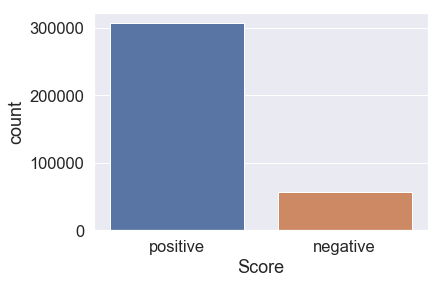

positive    307061
negative     57110
Name: Score, dtype: int64

In [272]:
sns.countplot(x=data_frame.Score, data=data_frame)
plt.show()
#Counts of positive and negative reviews
data_frame.Score.value_counts()

In [273]:
#Sorting the data based on the time attribute
data_frame.sort_values("Time", inplace=True)

#Resting the index of the data
data_frame = data_frame.reset_index(drop=True)

In [274]:
#Taking the top 50k points
data_50k = data_frame.head(50000)

In [275]:
#For Score consisting of two categories making them as positive for 1 and negative for 0
data_50k.Score = [1 if (score == 'positive') else 0 for score in data_50k.Score]

In [276]:
#Now storing CleanedText attribute into X and Score attribute into Y
X = data_50k.CleanedText
y = data_50k.Score

In [277]:
#Splitting the data into train and test
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [278]:
#Shape of the train and test data
print("Shape of train data:", X_tr.shape)
print("Shape of test data:",X_test.shape)

Shape of train data: (35000,)
Shape of test data: (15000,)


## 1. BOW:

 which means makes a vector for each review of length unique words from the whole dataset and makes frequency count of word.
 
- Bow or Bag of Words which means way of extracting features from text for use in modeling.
- A bag-of-words is a representation of text that describes the occurrence of words within a document. 
   
   It involves two things:
                1.vocabulary of known words.
                2.Measure of the presence of known words.
-  It is called a “bag” of words, because any information about the order or structure of words in the document is              discarded. The model is only concerned with whether known words occur in the document, not where in the document.

In [279]:

%%time

count_vec = CountVectorizer()
#Making the fit_transform for train data
bow_tr = count_vec.fit_transform(X_tr)

Wall time: 1.18 s


In [280]:
#Transform for test data
bow_test = count_vec.transform(X_test)

In [281]:
#Nomalizing the train and test data
bow_tr = preprocessing.normalize(bow_tr)
bow_test = preprocessing.normalize(bow_test)

In [282]:
#Shape of train and test data after bag of words with preprocessing
print("Shape of train data:", bow_tr.shape)
print("Shape of test data:", bow_test.shape)

Shape of train data: (35000, 26059)
Shape of test data: (15000, 26059)


** i. Brute Force Algorithm: **

    It is an exhaustive search go through all posiible cases and find the optimal solution.

**Grid Search Cross Validation:**

- working through multiple combinations of parameter tunes, cross validate each and determine                                  which one gives the best performance.      
    
- Note: In grid search, if you choosen n paramters then we will have to check 2^n combinations.

![title](grid search cross validation.png)

** Time based splitting:** 

- Provides train/test indices to split time series data samplesthat are observed at fixed time                                 intervals, in train/test sets.In each split, test indices must be higher than before, and thus shuffling in cross
  validator is inappropriate.

![title](time series split.png)

In [283]:
#Function for knn using the gri search cross validation with the train data
def knn_gsv_tbs(value, x_train, y_train):
   
    #Assigning the different neighbour values
    parameters = {'n_neighbors':list(range(5,13,2))}

    #knn with brute force search
    knn = KNeighborsClassifier(algorithm=value)

    #splitting the data based on the time series
    tbs = TimeSeriesSplit(n_splits=3)

    #parameter tuning can be done using Grid Search Cross Validation
    gsv = GridSearchCV(knn, parameters, n_jobs=3, verbose=4, cv=tbs, scoring='accuracy')
    gsv.fit(x_train, y_train)

    print("Optimal k_value:", gsv.best_params_)
    print("Best Accuracy:", gsv.best_score_  * 100)
    
    return gsv.grid_scores_, gsv.best_estimator_

In [284]:

%%time

#Calling the function for KNN using grid search cross validation with the train data
algorithm = 'brute'
best_scores, best_estimator = knn_gsv_tbs(algorithm, bow_tr, y_tr)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Optimal k_value: {'n_neighbors': 7}
Best Accuracy: 89.60761904761905
Wall time: 2min 7s


[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:  2.1min finished


In [285]:
#best_scores_ will return paramters, mean validation scores and cross validation scores
best_scores[:2]

[mean: 0.89470, std: 0.00296, params: {'n_neighbors': 5},
 mean: 0.89608, std: 0.00295, params: {'n_neighbors': 7}]

In [286]:
#Function to plot between cv_scores and neighbours
def neigh_cv_error(neighbors, cv_errors):
    plt.plot(neighbors, cv_errors)
    plt.title("neighbors vs cv_errors")
    plt.xlabel("Neighbors")
    plt.ylabel("cv_errors")
    plt.show()

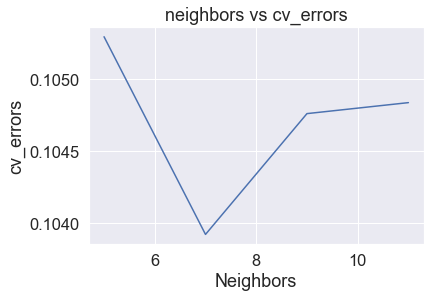

In [287]:
#Storing neighbors in to neigh variable
neigh = [val[0]['n_neighbors'] for val in best_scores]

#Storing all cv_errors in cv_error
cv_error = [1-val[1] for val in best_scores]

#Calling function for plot between cv_errors and corresponding neighbors
neigh_cv_error(neigh, cv_error)


** we can get the best estimator from the grid search, by using that we can test the data**

In [288]:
#Result showing the best classifier consisting of parameters
best_estimator

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [289]:
#Finding the predicted values for test labels using the test data
y_pred = best_estimator.predict(bow_test)

In [290]:
#Function for calculating the metrics
def test_metrics(y_test, y_pred):
    cm = pd.DataFrame(confusion_matrix(y_test,y_pred),range(2),range(2))
    sns.set(font_scale=1.5)
    sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g', vmin=0, vmax=15000)

    print("Accuracy on test data:", round(accuracy_score(y_test, y_pred) * 100 , 2))
    print("Precision on test data:", round(precision_score(y_test, y_pred) * 100 , 2))
    print("Recall on test data:", round(recall_score(y_test, y_pred) * 100 , 2))
    print("F1_score on test data:", round(f1_score(y_test, y_pred) * 100,2))

    plt.show()

Accuracy on test data: 88.79
Precision on test data: 89.17
Recall on test data: 99.34
F1_score on test data: 93.98


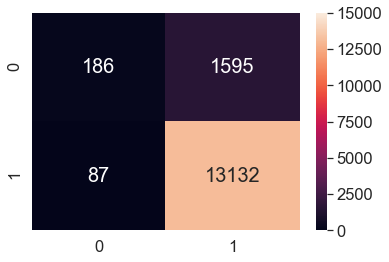

In [291]:
#Calling the function for test metrics
test_metrics(y_test, y_pred)

** ii. Kd_tree Algorithm: **
      
       1. kd_tree means k dimensional tree.
       2. It works as follows Using the train data build a datastructure that organizes dataset as a tree.
       3. Suppose if you want to find a nearest neighbors for query point then navigate into that tree.
       4. It can take all training instances(points) then it can pick random attribute(feature) and from that attribute 
          we can find the median, by that median we can split dataset into two halfs, left side points are
          less than the median and right side points are greater than equal to that median.\
       5. Repeat that procedure at the multiple iterations for the different random attributes, end up till predetermined
          numbber of points left in each branch of the tree.
       6. At each level splittng the dataset into two halfs so, depth of tree cann't be greater than log(n), where n is an
          number of instances(points).
       7. For kd_tree we should give input as dense matrix.

![title](kd_tree.gif)

In [292]:

%%time

#Converting Sparse matrix to dense matrix 
svd = TruncatedSVD(n_components=500, algorithm='randomized', random_state=15)
bow_tr_svd = svd.fit_transform(bow_tr)

Wall time: 16.5 s


In [293]:
bow_test_svd = svd.transform(bow_test)

In [294]:
#Shape of train and test data after truncated svd
print("Shape of train data:", bow_tr_svd.shape)
print("Shape of test data:", bow_test_svd.shape)

Shape of train data: (35000, 500)
Shape of test data: (15000, 500)


In [295]:

%%time

#Calling the function for KNN using grid search cross validation with the train data
algorithm = 'kd_tree'
best_scores, best_estimator = knn_gsv_tbs(algorithm, bow_tr_svd, y_tr)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed: 44.0min finished


Optimal k_value: {'n_neighbors': 11}
Best Accuracy: 89.1352380952381
Wall time: 44min 3s


In [301]:
#grid_scores_ will return paramters, mean validation scores and cross validation scores
best_scores[:2] 

[mean: 0.88331, std: 0.00777, params: {'n_neighbors': 5},
 mean: 0.88930, std: 0.00516, params: {'n_neighbors': 7}]

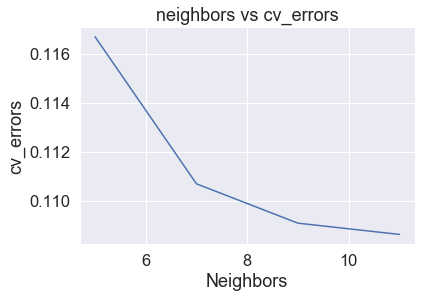

In [302]:
#Storing neighbors in to neigh variable
neigh = [val[0]['n_neighbors'] for val in best_scores]

#Storing all cv_errors in cv_error
cv_error = [1-val[1] for val in best_scores]

#Calling function for plot between cv_errors and corresponding neighbors
neigh_cv_error(neigh, cv_error)

** testing using best_estimator:**

In [303]:
#Result showing the best classifier consisting of parameters
best_estimator

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [304]:
#Finding the predicted values for test labels using the test data
y_pred = best_estimator.predict(bow_test_svd)

Accuracy on test data: 88.01
Precision on test data: 88.64
Recall on test data: 99.09
F1_score on test data: 93.58


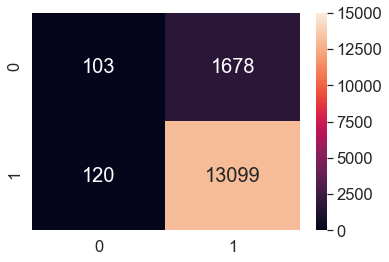

In [305]:
#Calling the function for test metrics
test_metrics(y_test, y_pred)

# TFIDF: 

TF-IDF stands for term frequency-inverse document frequency. TF-IDF weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

Term_frequency(TF) = (number of times word occur in document) / (Total number of words in the document).

Inverse_Document_freqency(IDF) = log((total number of documents) / In which documents a word occurs))

                   So, TF-IDF(word) = TF(word) * IDF(word)

In [306]:
#Vectorizing the data
tfidf_vect = TfidfVectorizer(ngram_range=(1,2))
tfidf_tr = tfidf_vect.fit_transform(X_tr)

In [307]:
#Vectorizing the test data
tfidf_test = tfidf_vect.transform(X_test)

** 1. Brute Force Algorithm:**

In [308]:

%%time

#Calling the function for KNN using grid search cross validation with the train data
algorithm = 'brute'
best_scores, best_estimator = knn_gsv_tbs(algorithm, tfidf_tr, y_tr)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Optimal k_value: {'n_neighbors': 9}
Best Accuracy: 89.77142857142857
Wall time: 2min 11s


[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:  2.2min finished


In [309]:
#grid_scores_ will return paramters, mean validation scores and cross validation scores
best_scores[:2] 

[mean: 0.89615, std: 0.00279, params: {'n_neighbors': 5},
 mean: 0.89730, std: 0.00173, params: {'n_neighbors': 7}]

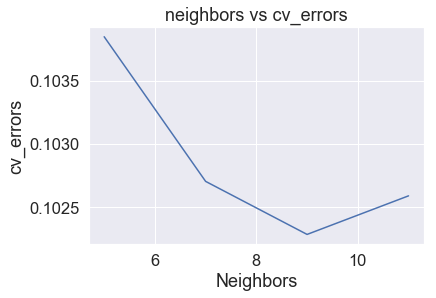

In [310]:
#Storing neighbors in to neigh variable
neigh = [val[0]['n_neighbors'] for val in best_scores]

#Storing all cv_errors in cv_error
cv_error = [1-val[1] for val in best_scores]

#Calling function for plot between cv_errors and corresponding neighbors
neigh_cv_error(neigh, cv_error)

** Testing the model using best_estimator_ which can find from grid search cross validation:**

In [311]:
#Result showing the best classifier consisting of parameters
best_estimator

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [312]:
#Finding the predicted values for test labels using the test data
y_pred = best_estimator.predict(tfidf_test)

Accuracy on test data: 89.02
Precision on test data: 89.2
Recall on test data: 99.6
F1_score on test data: 94.11


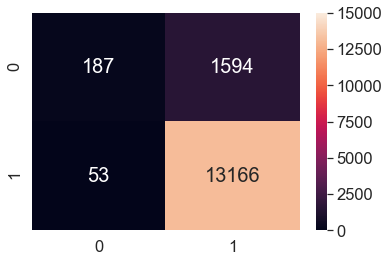

In [313]:
#Calling the function for test metrics
test_metrics(y_test, y_pred)

** 2. kd_tree Algorithm:**

In [314]:
#Converting the sparse matrix into dense matrix
svd = TruncatedSVD(n_components=500, algorithm='randomized', random_state=15)
tfidf_tr_svd = svd.fit_transform(tfidf_tr)

In [315]:
#For test data
tfidf_test_svd = svd.transform(tfidf_test)

In [316]:

%%time

#Calling the function for KNN using grid search cross validation with the train data
algorithm = 'brute'
best_scores, best_estimator = knn_gsv_tbs(algorithm, tfidf_tr_svd, y_tr)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:  1.7min finished


Optimal k_value: {'n_neighbors': 11}
Best Accuracy: 89.20380952380953
Wall time: 1min 41s


In [317]:
#grid_scores_ will return paramters, mean validation scores and cross validation scores
best_scores[:2] 

[mean: 0.88278, std: 0.00517, params: {'n_neighbors': 5},
 mean: 0.88819, std: 0.00360, params: {'n_neighbors': 7}]

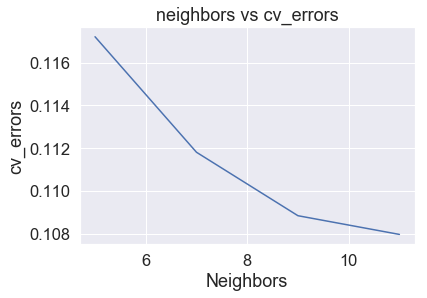

In [318]:
#Storing neighbors in to neigh variable
neigh = [val[0]['n_neighbors'] for val in best_scores]

#Storing all cv_errors in cv_error
cv_error = [1-val[1] for val in best_scores]

#Calling function for plot between cv_errors and corresponding neighbors
neigh_cv_error(neigh, cv_error)

** Testing the model using best_estimator_ which can find from grid search cross validation:**

In [319]:
#Result showing the best classifier consisting of parameters
best_estimator

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [320]:
#Finding the predicted values for test labels using the test data
y_pred = best_estimator.predict(tfidf_test_svd)

Accuracy on test data: 88.27
Precision on test data: 89.01
Recall on test data: 98.9
F1_score on test data: 93.7


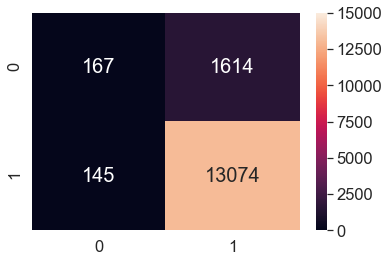

In [321]:
#Calling the function for test metrics
test_metrics(y_test, y_pred)

# Avg_W2V: 

          1. W2V can take the semantic meaning of the words.
          2. W2V can convert each word into an vector.
          3. Avg_W2V means for each review vector should be (W2V(word1) + W2V(word2)--------+ W2V(wordn)/(total no.of words).

In [200]:
#Forming the list_of_words for 50k reviews
sent_words = []
for sent in X:
    sent_words.append(sent.split())

In [201]:
#Splitting the into train and test data
X_tr_w2v, X_test_w2v, y_tr_w2v, y_test_w2v = train_test_split(sent_words, y, test_size=0.3, shuffle=False)

In [202]:
#Word to vectors for train data
w2v = gensim.models.Word2Vec(X_tr_w2v,min_count=5,size=50)

In [203]:
#storing w2v_words which can be return by w2v vocabilary
w2v_words = list(w2v.wv.vocab)
print("total words in w2v",len(w2v_words))
print(w2v_words[0:10])

total words in w2v 7931
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'car', 'drive', 'along']


In [204]:
#Function for Avg_w2v
def avg_w2v(data, w2v, w2v_words):
    #creating an empty list
    avg_vectors = []
    row = 0
    for sent in data:
        #creating an vector which size should be 50 and all cells have zero's
        sent_vec = np.zeros(50)
        cnt_words = 0
        for word in sent:
            if word in w2v_words:
                vec = w2v.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
            avg_vectors.append(sent_vec)
        row += 1 
        if cnt_words == 0:
            print(row)
    return avg_vectors

In [205]:
#Avg w2v for train data
X_tr_avg_w2v = avg_w2v(X_tr_w2v, w2v, w2v_words)

#Avg w2v for test data
X_test_avg_w2v = avg_w2v(X_test_w2v, w2v, w2v_words)

** 1. Brute Force Algorithm:**

In [206]:

%%time

#Calling the function for KNN using grid search cross validation with the train data
algorithm = 'brute'
best_scores, best_estimator = knn_gsv_tbs(algorithm, X_tr_avg_w2v, y_tr_w2v)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Optimal k_value: {'n_neighbors': 11}
Best Accuracy: 89.80952380952381
Wall time: 1min 23s


[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:  1.4min finished


In [207]:
#grid_scores_ will return paramters, mean validation scores and cross validation scores
best_scores[:2] 

[mean: 0.89341, std: 0.00225, params: {'n_neighbors': 5},
 mean: 0.89486, std: 0.00247, params: {'n_neighbors': 7}]

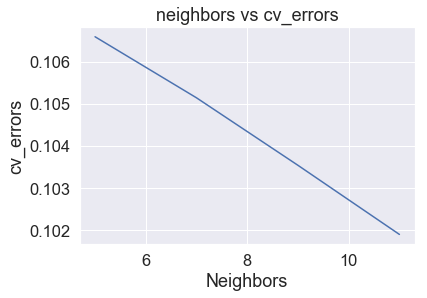

In [208]:
#Storing neighbors in to neigh variable
neigh = [val[0]['n_neighbors'] for val in best_scores]

#Storing all cv_errors in cv_error
cv_error = [1-val[1] for val in best_scores]

#Calling function for plot between cv_errors and corresponding neighbors
neigh_cv_error(neigh, cv_error)

** Testing the model using best_estimator_ which can find from grid search cross validation:**

In [209]:
#Result showing the best classifier consisting of parameters
best_estimator

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [210]:
#Finding the predicted values for test labels using the test data
y_pred = best_estimator.predict(X_test_avg_w2v)

Accuracy on test data: 89.34
Precision on test data: 89.9
Recall on test data: 99.02
F1_score on test data: 94.24


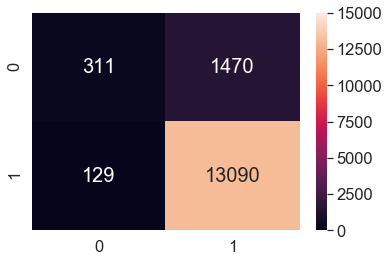

In [211]:
#Calling the function for test metrics
test_metrics(y_test_w2v, y_pred)

** 2. kd_tree Algorithm:**

In [212]:

%%time

#Calling the function for KNN using grid search cross validation with the train data
algorithm = 'kd_tree'
best_scores, best_estimator = knn_gsv_tbs(algorithm, X_tr_avg_w2v, y_tr_w2v)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:  5.7min finished


Optimal k_value: {'n_neighbors': 11}
Best Accuracy: 89.80952380952381
Wall time: 5min 41s


In [213]:
#grid_scores_ will return paramters, mean validation scores and cross validation scores
best_scores[:2] 

[mean: 0.89341, std: 0.00225, params: {'n_neighbors': 5},
 mean: 0.89486, std: 0.00247, params: {'n_neighbors': 7}]

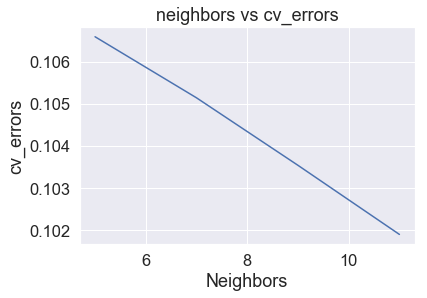

In [214]:
#Storing neighbors in to neigh variable
neigh = [val[0]['n_neighbors'] for val in best_scores]

#Storing all cv_errors in cv_error
cv_error = [1-val[1] for val in best_scores]

#Calling function for plot between cv_errors and corresponding neighbors
neigh_cv_error(neigh, cv_error)

** Testing the model using best_estimator_ which can find from grid search cross validation:**

In [215]:
#Result showing the best classifier consisting of parameters
best_estimator

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [216]:
#Finding the predicted values for test labels using the test data
y_pred = best_estimator.predict(X_test_avg_w2v)

Accuracy on test data: 89.34
Precision on test data: 89.9
Recall on test data: 99.02
F1_score on test data: 94.24


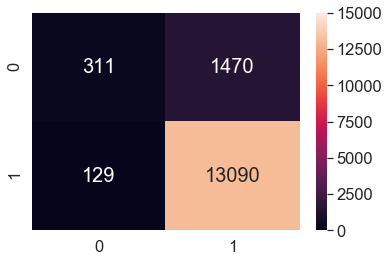

In [217]:
#Calling the function for test metrics
test_metrics(y_test_w2v, y_pred)

# TFIDF_W2V: 

In [218]:
#Function for tfidf_w2v
def tfidf_w2v(tfidf_vect, X, w2v, w2v_words, tfidf):
    features = tfidf_vect.get_feature_names()
    tfidf_w2vs = []
    row = 0
    #Assigning empty list for no_words_matched with the train w2v vocabillory
    no_words_matched = []
    
    for sent in X:
        sent_vec = np.zeros(50)
        tfidf_sum = 0
        for word in sent:
            if(word in w2v_words):
                vec = w2v.wv[word]
                tfidf_value = tfidf[row, features.index(word)]
                sent_vec += (vec * tfidf_value)
                tfidf_sum += tfidf_value
        if(tfidf_sum != 0):
            sent_vec /= tfidf_sum
            tfidf_w2vs.append(sent_vec)
        
        
        if(tfidf_sum == 0):
            if(row==1):
                print("In some of the text reviews of all words not present in train vocabilary, those rows are:")
            print(row)
            no_words_matched.append(row)
        row += 1
    return tfidf_w2vs, no_words_matched

In [219]:

%%time

#tfidf w2v for training data
tfidf_w2v_tr, no_words_matched_tr = tfidf_w2v(tfidf_vect, X_tr_w2v, w2v, w2v_words, tfidf_tr)

Wall time: 7h 9min 56s


In [232]:
print(X_test_w2v[:1])

[['mani', 'famili', 'member', 'toler', 'gluten', 'visit', 'one', 'tri', 'cracker', 'realli', 'like', 'dont', 'tast', 'like', 'ritz', 'flavor', 'anyway', 'read', 'label', 'know', 'ingredi', 'herb', 'flavor', 'strong', 'even', 'packag', 'open', 'week', 'still', 'tast', 'fresh', 'made', 'cracker', 'would', 'tast', 'like']]


In [238]:
#tfidf w2v for training data
tfidf_w2v_test, no_words_matched_test= tfidf_w2v(tfidf_vect, X_test_w2v, w2v, w2v_words, tfidf_tr)

In [240]:
#index of the test labels start with 35000
no_words_matched_test = [34999+val for val in no_words_matched_test]



#Droping the labels of corresponding test reviews whose words not match with train vocabilory
y_test_w2v.drop(labels=no_words_matched_test, inplace=True)   


In [241]:
print(len(y_test_w2v))

10164


In [222]:
#saving the training data of tfidf_w2v
savetofile(tfidf_w2v_tr,"tfidf_w2v_train_of_50k_pts")
#saving labels of train data
savetofile(y_tr_w2v, "tfidf_y_tr_w2v_of_50k_pts")

In [223]:
#saving the test data of tfidf_w2v
savetofile(tfidf_w2v_test,"tfidf_w2v_test_of_50k_pts")
#saving labels of test data
savetofile(y_test_w2v, "tfidf_y_test_w2v_of_50k_pts")

** 1. Brute Force Algorithm:**

In [224]:

%%time

#Calling the function for KNN using grid search cross validation with the train data
algorithm = 'brute'
best_scores, best_estimator = knn_gsv_tbs(algorithm, tfidf_w2v_tr, y_tr_w2v)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Optimal k_value: {'n_neighbors': 11}
Best Accuracy: 89.62666666666667
Wall time: 1min 27s


[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:  1.4min finished


In [225]:
#grid_scores_ will return paramters, mean validation scores and cross validation scores
best_scores[:2] 

[mean: 0.89211, std: 0.00232, params: {'n_neighbors': 5},
 mean: 0.89531, std: 0.00323, params: {'n_neighbors': 7}]

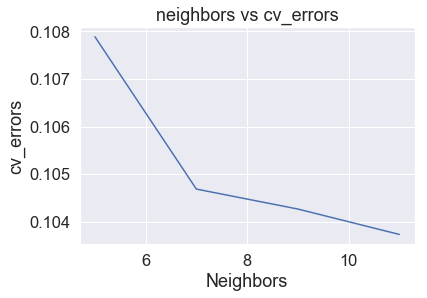

In [226]:
#Storing neighbors in to neigh variable
neigh = [val[0]['n_neighbors'] for val in best_scores]

#Storing all cv_errors in cv_error
cv_error = [1-val[1] for val in best_scores]

#Calling function for plot between cv_errors and corresponding neighbors
neigh_cv_error(neigh, cv_error)

** Testing the model using best_estimator_ which can find from grid search cross validation:**

In [227]:
#Result showing the best classifier consisting of parameters
best_estimator

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [228]:
#Finding the predicted values for test labels using the test data
y_pred = best_estimator.predict(tfidf_w2v_test)

In [244]:
len(y_pred), len(y_test_w2v)

(10164, 10164)

Accuracy on test data: 87.12
Precision on test data: 88.44
Recall on test data: 98.25
F1_score on test data: 93.09


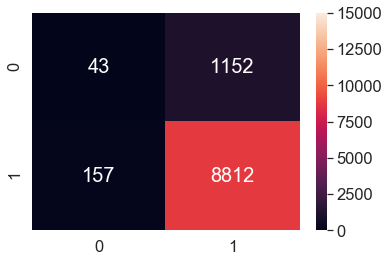

In [258]:
#Calling the function for test metrics
test_metrics(y_test_w2v, y_pred)

** 2. kd_tree Algorithm:**

In [259]:

%%time

#Calling the function for KNN using grid search cross validation with the train data
algorithm = 'kd_tree'
best_scores, best_estimator = knn_gsv_tbs(algorithm, tfidf_w2v_tr, y_tr_w2v)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:  4.9min finished


Optimal k_value: {'n_neighbors': 11}
Best Accuracy: 89.62666666666667
Wall time: 4min 55s


In [261]:
#grid_scores_ will return paramters, mean validation scores and cross validation scores
best_scores[:2] 

[mean: 0.89211, std: 0.00232, params: {'n_neighbors': 5},
 mean: 0.89531, std: 0.00323, params: {'n_neighbors': 7}]

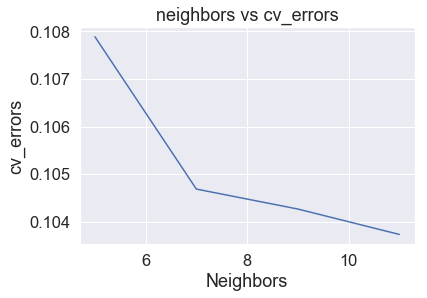

In [262]:
#Storing neighbors in to neigh variable
neigh = [val[0]['n_neighbors'] for val in best_scores]

#Storing all cv_errors in cv_error
cv_error = [1-val[1] for val in best_scores]

#Calling function for plot between cv_errors and corresponding neighbors
neigh_cv_error(neigh, cv_error)

** Testing the model using best_estimator_ which can find from grid search cross validation:**

In [263]:
#Result showing the best classifier consisting of parameters
best_estimator

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [264]:
#Finding the predicted values for test labels using the test data
y_pred = best_estimator.predict(tfidf_w2v_test)

Accuracy on test data: 87.12
Precision on test data: 88.44
Recall on test data: 98.25
F1_score on test data: 93.09


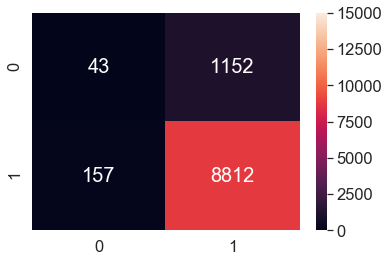

In [265]:
#Calling the function for test metrics
test_metrics(y_test_w2v, y_pred)

# Summary: 

**K-nn with different text classification and different algorithms:**

|          |sample size|Optimal_K|Brute Force   |              |optimal_k| k-d tree     |            |                     
|----------|-----------|---------|--------------|--------------|---------|--------------|------------| 
|          |           |         |Train accuracy|Test accuracy |         |Tain accuracy |Test accuracy
|BOW       | 50k       |   07    |   89.60%     |    88.79%    | 11      | 89.13%       |   88.01%   |
|TF-IDF    | 50k       |   09    |   89.77%     |    89.02%    | 11      |89.20%        |   89.27%   |
|Avg-W2V   | 50k       |   11    |   89.80%     |    89.34%    | 11      |89.80%        |   89.34%   |
|TF-IDF W2V| 50k       |   11    |   89.62%     |    87.12%    | 11      |89.62%        |   87.12%   |


**observation:**

1. Given dataset is an imbalanced data so, majority is an +ve class and minority class is -ve class.
2. kd_tree doesn't take input as sparse matrix and as compared to kd_tree brute force can take less time
3. if diemnsion is large then kd_tree is good.
4. In all text classification knn is predicting -ve label to be +ve label.
5. Among all text classification Avg_w2v is working well for this problem.